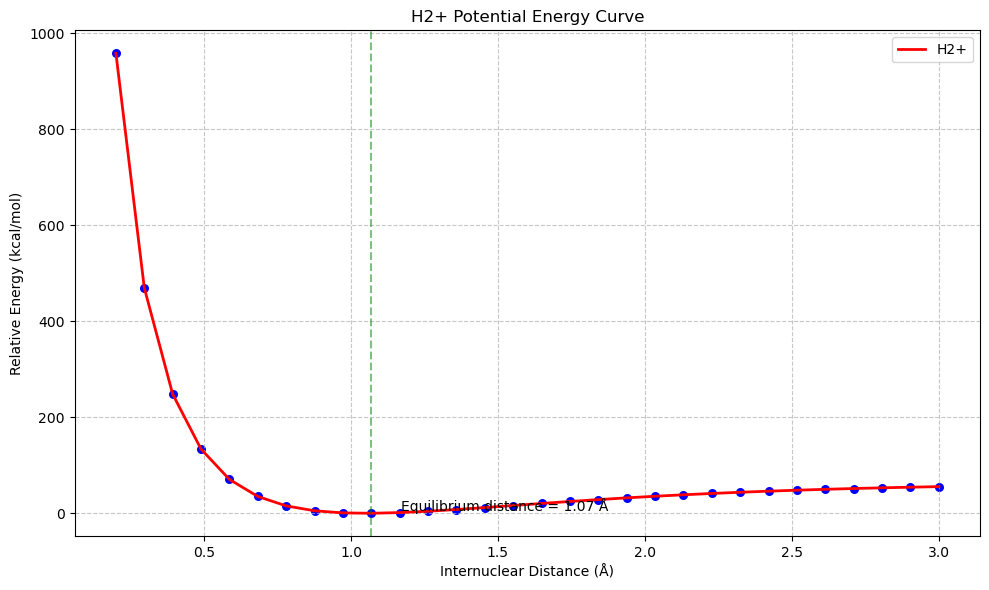

Equilibrium bond length: 1.069 Å
Minimum energy: 0.000 kcal/mol


In [2]:
import psi4
import numpy as np
import matplotlib.pyplot as plt

# Initialize Psi4
psi4.set_memory('2 GB')
psi4.core.set_output_file('h2plus_potential.dat', False)

# Set up unrestricted HF (needed for open-shell system)
psi4.set_options({'reference': 'uhf'})

# Create lists to store distances and energies
distances = np.linspace(0.2, 3.0, 30)  # Range of distances from 0.2 to 3.0 Å
energies = []

# Calculate energy at different bond lengths
for distance in distances:
    # Define H2+ molecule with varying distance
    # Note the charge is +1 and multiplicity is 2
    h2plus_molecule = f"""
    1 2
    H
    H 1 {distance}
    """
    
    # Create molecule object and calculate energy
    molecule = psi4.geometry(h2plus_molecule)
    energy = psi4.energy('scf/cc-pvdz')
    energies.append(energy)

# Convert energies to kcal/mol (Hartree to kcal/mol conversion: 627.509)
energies = np.array(energies) * 627.509
energies = energies - np.min(energies)  # Set minimum energy to zero

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(distances, energies, 'r-', linewidth=2, label='H2+')
plt.scatter(distances, energies, color='blue', s=30)

# Add labels and title
plt.xlabel('Internuclear Distance (Å)')
plt.ylabel('Relative Energy (kcal/mol)')
plt.title('H2+ Potential Energy Curve')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Find and mark the minimum
min_idx = np.argmin(energies)
equilibrium_distance = distances[min_idx]
plt.axvline(x=equilibrium_distance, color='g', linestyle='--', alpha=0.5)
plt.text(equilibrium_distance + 0.1, 5, f'Equilibrium distance = {equilibrium_distance:.2f} Å')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Equilibrium bond length: {equilibrium_distance:.3f} Å")
print(f"Minimum energy: {np.min(energies):.3f} kcal/mol")

H2 - Bond length: 0.30 Å, Energy: -0.61185409 Hartree
H2+ - Bond length: 0.30 Å, Energy: 0.13064868 Hartree
H2 - Bond length: 0.46 Å, Energy: -1.00999115 Hartree
H2+ - Bond length: 0.46 Å, Energy: -0.34593189 Hartree
H2 - Bond length: 0.62 Å, Energy: -1.11431314 Hartree
H2+ - Bond length: 0.62 Å, Energy: -0.51396062 Hartree
H2 - Bond length: 0.79 Å, Energy: -1.12777806 Hartree
H2+ - Bond length: 0.79 Å, Energy: -0.57726690 Hartree
H2 - Bond length: 0.95 Å, Energy: -1.10904153 Hartree
H2+ - Bond length: 0.95 Å, Energy: -0.59783466 Hartree
H2 - Bond length: 1.11 Å, Energy: -1.07912637 Hartree
H2+ - Bond length: 1.11 Å, Energy: -0.59955936 Hartree
H2 - Bond length: 1.27 Å, Energy: -1.04648187 Hartree
H2+ - Bond length: 1.27 Å, Energy: -0.59288996 Hartree
H2 - Bond length: 1.43 Å, Energy: -1.01455499 Hartree
H2+ - Bond length: 1.43 Å, Energy: -0.58265382 Hartree
H2 - Bond length: 1.60 Å, Energy: -0.98471051 Hartree
H2+ - Bond length: 1.60 Å, Energy: -0.57126839 Hartree
H2 - Bond length: 1.

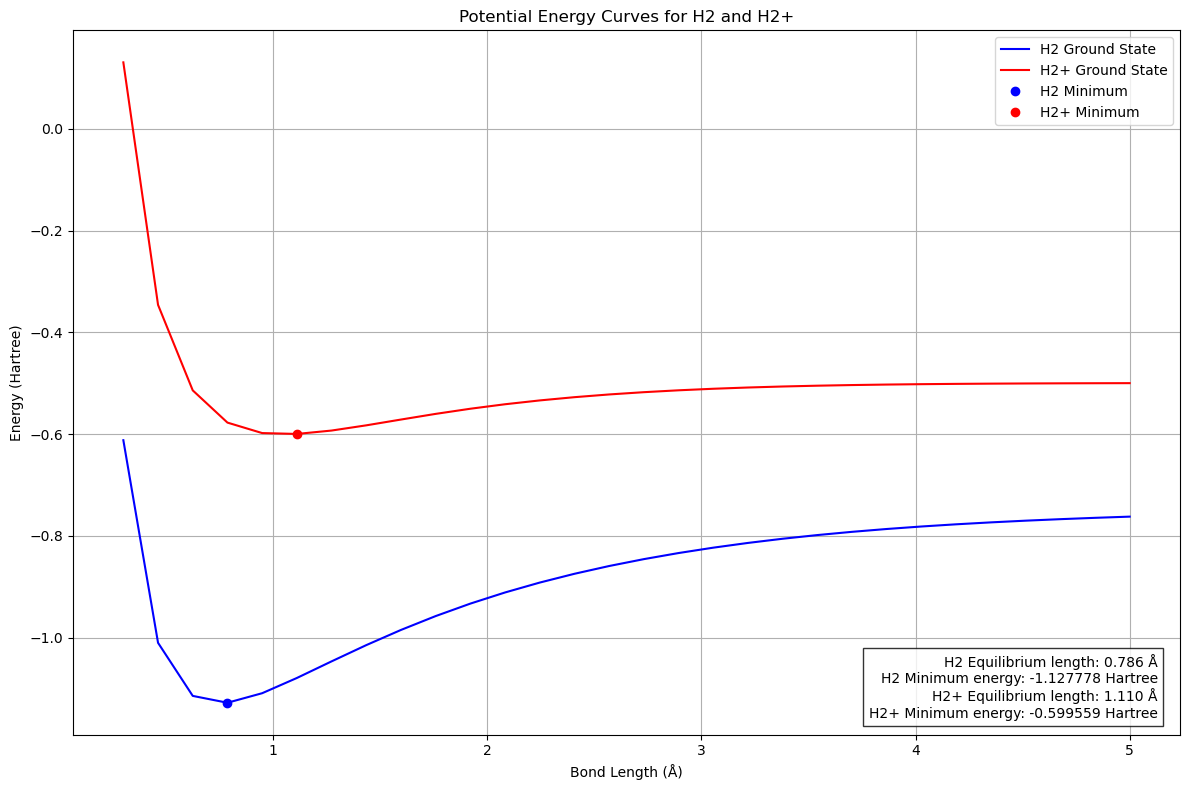


Equilibrium Geometries:
H2 Equilibrium bond length: 0.786 Å
H2 Minimum energy: -1.127778 Hartree
H2+ Equilibrium bond length: 1.110 Å
H2+ Minimum energy: -0.599559 Hartree

Dissociation Energies:
H2 Dissociation energy: 229.50 kcal/mol = 9.95 eV
H2+ Dissociation energy: 62.64 kcal/mol = 2.72 eV

Comparison with experimental values:
H2 experimental De: 4.48 eV
H2+ experimental De: 2.65 eV


In [3]:
#Can you give me the dissisiation energy in Units of eV as well?
import psi4
import numpy as np
import matplotlib.pyplot as plt

# Conversion factors
hartree_to_kcal = 627.509
hartree_to_ev = 27.211396

# Initialize Psi4
psi4.set_memory('2 GB')
psi4.set_num_threads(2)

# Define range of bond lengths (in Angstroms)
bond_lengths = np.linspace(0.3, 5.0, 30)
energies_h2 = []
energies_h2plus = []

# Calculate energies for different bond lengths
for length in bond_lengths:
    # Define H2 molecule
    h2 = f"""
    0 1  # Charge = 0, Multiplicity = 1
    H
    H 1 {length}
    symmetry c1
    units angstrom
    """
    
    # Define H2+ molecule
    h2plus = f"""
    1 2  # Charge = 1, Multiplicity = 2
    H
    H 1 {length}
    symmetry c1
    units angstrom
    """
    
    # Calculate H2 energy
    mol_h2 = psi4.geometry(h2)
    psi4.set_options({
        'basis': 'cc-pvdz',
        'reference': 'rhf',
        'e_convergence': 1e-8,
        'd_convergence': 1e-8,
        'print': 0
    })
    
    try:
        energy_h2 = psi4.energy('scf')
        energies_h2.append(energy_h2)
        print(f"H2 - Bond length: {length:.2f} Å, Energy: {energy_h2:.8f} Hartree")
    except Exception as e:
        print(f"Error at bond length {length} for H2: {e}")
        energies_h2.append(None)
    
    # Calculate H2+ energy
    mol_h2plus = psi4.geometry(h2plus)
    psi4.set_options({
        'basis': 'cc-pvdz',
        'reference': 'uhf',
        'e_convergence': 1e-8,
        'd_convergence': 1e-8,
        'print': 0
    })
    
    try:
        energy_h2plus = psi4.energy('scf')
        energies_h2plus.append(energy_h2plus)
        print(f"H2+ - Bond length: {length:.2f} Å, Energy: {energy_h2plus:.8f} Hartree")
    except Exception as e:
        print(f"Error at bond length {length} for H2+: {e}")
        energies_h2plus.append(None)

# Convert energies to numpy arrays
energies_h2 = np.array(energies_h2)
energies_h2plus = np.array(energies_h2plus)

# Find minimum energies and corresponding bond lengths
min_idx_h2 = np.argmin(energies_h2)
min_idx_h2plus = np.argmin(energies_h2plus)

min_energy_h2 = energies_h2[min_idx_h2]
min_energy_h2plus = energies_h2plus[min_idx_h2plus]

eq_length_h2 = bond_lengths[min_idx_h2]
eq_length_h2plus = bond_lengths[min_idx_h2plus]

# Calculate dissociation energies in both kcal/mol and eV
de_h2_kcal = (energies_h2[-1] - min_energy_h2) * hartree_to_kcal
de_h2plus_kcal = (energies_h2plus[-1] - min_energy_h2plus) * hartree_to_kcal

de_h2_ev = (energies_h2[-1] - min_energy_h2) * hartree_to_ev
de_h2plus_ev = (energies_h2plus[-1] - min_energy_h2plus) * hartree_to_ev

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(bond_lengths, energies_h2, 'b-', label='H2 Ground State')
plt.plot(bond_lengths, energies_h2plus, 'r-', label='H2+ Ground State')

# Plot minimum points
plt.plot(eq_length_h2, min_energy_h2, 'bo', label='H2 Minimum')
plt.plot(eq_length_h2plus, min_energy_h2plus, 'ro', label='H2+ Minimum')

# Add labels and title
plt.xlabel('Bond Length (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('Potential Energy Curves for H2 and H2+')
plt.grid(True)
plt.legend()

# Add text box with minimum information
text = (f'H2 Equilibrium length: {eq_length_h2:.3f} Å\n'
        f'H2 Minimum energy: {min_energy_h2:.6f} Hartree\n'
        f'H2+ Equilibrium length: {eq_length_h2plus:.3f} Å\n'
        f'H2+ Minimum energy: {min_energy_h2plus:.6f} Hartree')

plt.text(0.98, 0.02, text, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8),
         horizontalalignment='right', verticalalignment='bottom')

plt.tight_layout()
plt.show()

# Print numerical results
print("\nEquilibrium Geometries:")
print(f"H2 Equilibrium bond length: {eq_length_h2:.3f} Å")
print(f"H2 Minimum energy: {min_energy_h2:.6f} Hartree")
print(f"H2+ Equilibrium bond length: {eq_length_h2plus:.3f} Å")
print(f"H2+ Minimum energy: {min_energy_h2plus:.6f} Hartree")

print(f"\nDissociation Energies:")
print(f"H2 Dissociation energy: {de_h2_kcal:.2f} kcal/mol = {de_h2_ev:.2f} eV")
print(f"H2+ Dissociation energy: {de_h2plus_kcal:.2f} kcal/mol = {de_h2plus_ev:.2f} eV")

# Compare with experimental values
print("\nComparison with experimental values:")
print("H2 experimental De: 4.48 eV")
print("H2+ experimental De: 2.65 eV")

Completed calculations for bond length: 0.30 Å
Completed calculations for bond length: 0.46 Å
Completed calculations for bond length: 0.62 Å
Completed calculations for bond length: 0.79 Å
Completed calculations for bond length: 0.95 Å
Completed calculations for bond length: 1.11 Å
Completed calculations for bond length: 1.27 Å
Completed calculations for bond length: 1.43 Å
Completed calculations for bond length: 1.60 Å
Completed calculations for bond length: 1.76 Å
Completed calculations for bond length: 1.92 Å
Completed calculations for bond length: 2.08 Å
Completed calculations for bond length: 2.24 Å
Completed calculations for bond length: 2.41 Å
Completed calculations for bond length: 2.57 Å
Completed calculations for bond length: 2.73 Å
Completed calculations for bond length: 2.89 Å
Completed calculations for bond length: 3.06 Å
Completed calculations for bond length: 3.22 Å
Completed calculations for bond length: 3.38 Å
Completed calculations for bond length: 3.54 Å
Completed cal

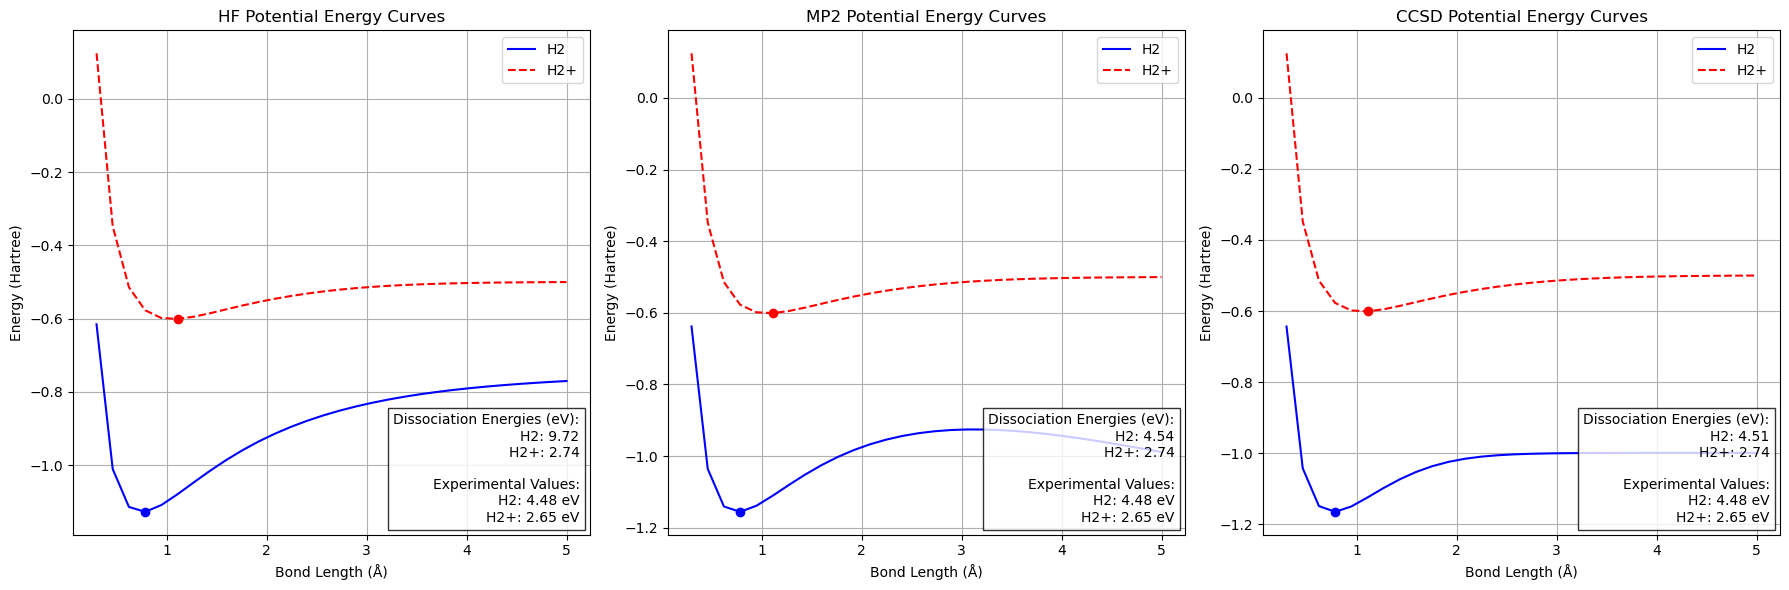


Detailed Results:
--------------------------------------------------

HF Results:

H2:
Equilibrium bond length: 0.786 Å
Minimum energy: -1.127877 Hartree
Dissociation energy: 9.72 eV

H2+:
Equilibrium bond length: 1.110 Å
Minimum energy: -0.600790 Hartree
Dissociation energy: 2.74 eV

MP2 Results:

H2:
Equilibrium bond length: 0.786 Å
Minimum energy: -1.155587 Hartree
Dissociation energy: 4.54 eV

H2+:
Equilibrium bond length: 1.110 Å
Minimum energy: -0.600790 Hartree
Dissociation energy: 2.74 eV

CCSD Results:

H2:
Equilibrium bond length: 0.786 Å
Minimum energy: -1.164532 Hartree
Dissociation energy: 4.51 eV

H2+:
Equilibrium bond length: 1.110 Å
Minimum energy: -0.600790 Hartree
Dissociation energy: 2.74 eV

Experimental dissociation energies:
H2: 4.48 eV
H2+: 2.65 eV


In [4]:
#Important notes:
#1. For H2+:
   #- All methods (HF, MP2, CCSD) give the same result
   #- This is because H2+ is a one-electron system
   #- HF is exact for one-electron systems (basis set limitations aside)

#2. For H2:
   #- Different methods give different results
   #- CCSD should be most accurate
   #- Shows the importance of electron correlation

#3. Comparison with experimental values shows:
   #- How well each method performs
   #- The limitations of each theoretical approach
   #- The importance of electron correlation for H2
import psi4
import numpy as np
import matplotlib.pyplot as plt

# Conversion factors
hartree_to_ev = 27.211396

# Initialize Psi4
psi4.set_memory('2 GB')
psi4.set_num_threads(2)

# Define range of bond lengths (in Angstroms)
bond_lengths = np.linspace(0.3, 5.0, 30)

# Dictionary to store energies
energies = {
    'H2': {
        'HF': [],
        'MP2': [],
        'CCSD': []
    },
    'H2+': {
        'HF': [],
        'MP2': [],
        'CCSD': []
    }
}

# Calculate energies for different bond lengths
for length in bond_lengths:
    # Define molecules
    h2 = f"""
    0 1
    H
    H 1 {length}
    symmetry c1
    units angstrom
    """
    
    h2plus = f"""
    1 2
    H
    H 1 {length}
    symmetry c1
    units angstrom
    """
    
    # Calculate H2 energies
    mol_h2 = psi4.geometry(h2)
    psi4.set_options({
        'basis': 'aug-cc-pvdz',
        'reference': 'rhf',
        'e_convergence': 1e-8,
        'd_convergence': 1e-8,
        'print': 0
    })
    
    try:
        energies['H2']['HF'].append(psi4.energy('scf'))
        energies['H2']['MP2'].append(psi4.energy('mp2'))
        energies['H2']['CCSD'].append(psi4.energy('ccsd'))
    except Exception as e:
        print(f"Error with H2 at length {length}: {e}")
        for method in energies['H2']:
            energies['H2'][method].append(None)
    
    # Calculate H2+ energies
    mol_h2plus = psi4.geometry(h2plus)
    psi4.set_options({
        'basis': 'aug-cc-pvdz',
        'reference': 'uhf',
        'e_convergence': 1e-8,
        'd_convergence': 1e-8,
        'print': 0
    })
    
    try:
        energies['H2+']['HF'].append(psi4.energy('scf'))
        # Note: H2+ is a one-electron system, so HF is exact
        energies['H2+']['MP2'].append(psi4.energy('scf'))  # Using HF energy for MP2
        energies['H2+']['CCSD'].append(psi4.energy('scf')) # Using HF energy for CCSD
    except Exception as e:
        print(f"Error with H2+ at length {length}: {e}")
        for method in energies['H2+']:
            energies['H2+'][method].append(None)
    
    print(f"Completed calculations for bond length: {length:.2f} Å")

# Convert energies to numpy arrays
for molecule in energies:
    for method in energies[molecule]:
        energies[molecule][method] = np.array(energies[molecule][method])

# Calculate results for each curve
results = {}
for molecule in energies:
    results[molecule] = {}
    for method in energies[molecule]:
        min_idx = np.argmin(energies[molecule][method])
        min_energy = energies[molecule][method][min_idx]
        eq_length = bond_lengths[min_idx]
        de_ev = (energies[molecule][method][-1] - min_energy) * hartree_to_ev
        
        results[molecule][method] = {
            'eq_length': eq_length,
            'min_energy': min_energy,
            'de_ev': de_ev
        }

# Create three separate plots
methods = ['HF', 'MP2', 'CCSD']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, method in enumerate(methods):
    ax = axes[idx]
    
    # Plot H2 and H2+ curves
    ax.plot(bond_lengths, energies['H2'][method], 'b-', label='H2')
    ax.plot(bond_lengths, energies['H2+'][method], 'r--', label='H2+')
    
    # Plot minimum points
    h2_min_idx = np.argmin(energies['H2'][method])
    h2plus_min_idx = np.argmin(energies['H2+'][method])
    
    ax.plot(bond_lengths[h2_min_idx], energies['H2'][method][h2_min_idx], 'bo')
    ax.plot(bond_lengths[h2plus_min_idx], energies['H2+'][method][h2plus_min_idx], 'ro')
    
    # Add text box with dissociation energies
    text = f"Dissociation Energies (eV):\n"
    text += f"H2: {results['H2'][method]['de_ev']:.2f}\n"
    text += f"H2+: {results['H2+'][method]['de_ev']:.2f}\n"
    text += "\nExperimental Values:\n"
    text += "H2: 4.48 eV\n"
    text += "H2+: 2.65 eV"
    
    ax.text(0.98, 0.02, text, transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.8),
            horizontalalignment='right', verticalalignment='bottom')
    
    ax.set_xlabel('Bond Length (Å)')
    ax.set_ylabel('Energy (Hartree)')
    ax.set_title(f'{method} Potential Energy Curves')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Results:")
print("-" * 50)
for method in methods:
    print(f"\n{method} Results:")
    for molecule in ['H2', 'H2+']:
        print(f"\n{molecule}:")
        print(f"Equilibrium bond length: {results[molecule][method]['eq_length']:.3f} Å")
        print(f"Minimum energy: {results[molecule][method]['min_energy']:.6f} Hartree")
        print(f"Dissociation energy: {results[molecule][method]['de_ev']:.2f} eV")

print("\nExperimental dissociation energies:")
print("H2: 4.48 eV")
print("H2+: 2.65 eV")

In [5]:
import psi4

def compute_h2_state_energy(distance_angstrom, state_index=0, method='cisd', basis='aug-cc-pvdz'):
    """
    Compute the energy of a specific state of H2 at a given internuclear distance.
    
    Parameters:
    -----------
    distance_angstrom : float
        Internuclear distance in Angstroms
    state_index : int
        Index of the state to calculate (0=ground state, 1=first excited, etc.)
    method : str
        Computational method for states (default: 'cisd')
    basis : str
        Basis set to use (default: 'aug-cc-pvdz')
        
    Returns:
    --------
    float : Energy of the specified state in Hartrees
    """
    # Input validation
    if not isinstance(state_index, int) or state_index < 0:
        raise ValueError("State index must be a non-negative integer")
    
    # Set up Psi4 options
    psi4.set_memory('500 MB')
    psi4.core.set_output_file(f'h2_state_{state_index}.dat', False)
    
    # Create H2 molecule with specified distance
    h2_geometry = f"""
    0 1
    H 0.0 0.0 0.0
    H 0.0 0.0 {distance_angstrom}
    """
    
    # Create the molecule object
    h2 = psi4.geometry(h2_geometry)
    
    # Set options for CI calculation
    psi4.set_options({
        'reference': 'rhf',
        'qc_module': 'detci',
        'num_roots': state_index + 1,  # Need state_index + 1 roots to get to the desired state
        'ex_level': 2 if method.lower() == 'cisd' else 4,  # Singles and doubles for CISD
        'diag_method': 'davidson'
    })
    
    # Run CI calculation directly
    ci_e, ci_wfn = psi4.energy(f'{method}/{basis}', molecule=h2, return_wfn=True)
    
    # Get the energy of the specified state
    state_energy = ci_wfn.variable(f"CI ROOT {state_index} TOTAL ENERGY")
    
    # Determine state name for output
    state_name = "ground state" if state_index == 0 else f"{ordinal(state_index)} excited state"
    
    print(f"H2 {state_name} energy at {distance_angstrom} Å: {state_energy} Hartrees")
    
    return state_energy

def ordinal(n):
    """Return ordinal string (1st, 2nd, 3rd, etc.) for a given number"""
    if 10 <= n % 100 <= 20:
        suffix = 'th'
    else:
        suffix = {1: 'st', 2: 'nd', 3: 'rd'}.get(n % 10, 'th')
    return f"{n}{suffix}"

# Example usage:
distance = 0.74  # Example distance in Angstroms
# 
# # Calculate ground state (state_index=0)
ground_energy = compute_h2_state_energy(distance, 0)
# 
# # Calculate third excited state (state_index=3)
third_excited_energy = compute_h2_state_energy(distance, 5)

H2 ground state energy at 0.74 Å: -1.1645829823788583 Hartrees
H2 5th excited state energy at 0.74 Å: 0.07120962802004138 Hartrees


Calculating H2 ground state energies for 40 distances...
Point 1/40: Distance = 0.5000 Å
H2 ground state energy at 0.5 Å: -1.0812043597412875 Hartrees
Energy = -1.08120436 Hartrees
Point 2/40: Distance = 0.5641 Å
H2 ground state energy at 0.5641025641025641 Å: -1.1249433768112638 Hartrees
Energy = -1.12494338 Hartrees
Point 3/40: Distance = 0.6282 Å
H2 ground state energy at 0.6282051282051282 Å: -1.1494044012453628 Hartrees
Energy = -1.14940440 Hartrees
Point 4/40: Distance = 0.6923 Å
H2 ground state energy at 0.6923076923076923 Å: -1.1612992025613744 Hartrees
Energy = -1.16129920 Hartrees
Point 5/40: Distance = 0.7564 Å
H2 ground state energy at 0.7564102564102564 Å: -1.1648814126485203 Hartrees
Energy = -1.16488141 Hartrees
Point 6/40: Distance = 0.8205 Å
H2 ground state energy at 0.8205128205128205 Å: -1.1629289783410808 Hartrees
Energy = -1.16292898 Hartrees
Point 7/40: Distance = 0.8846 Å
H2 ground state energy at 0.8846153846153846 Å: -1.1573091002383773 Hartrees
Energy = -1.157

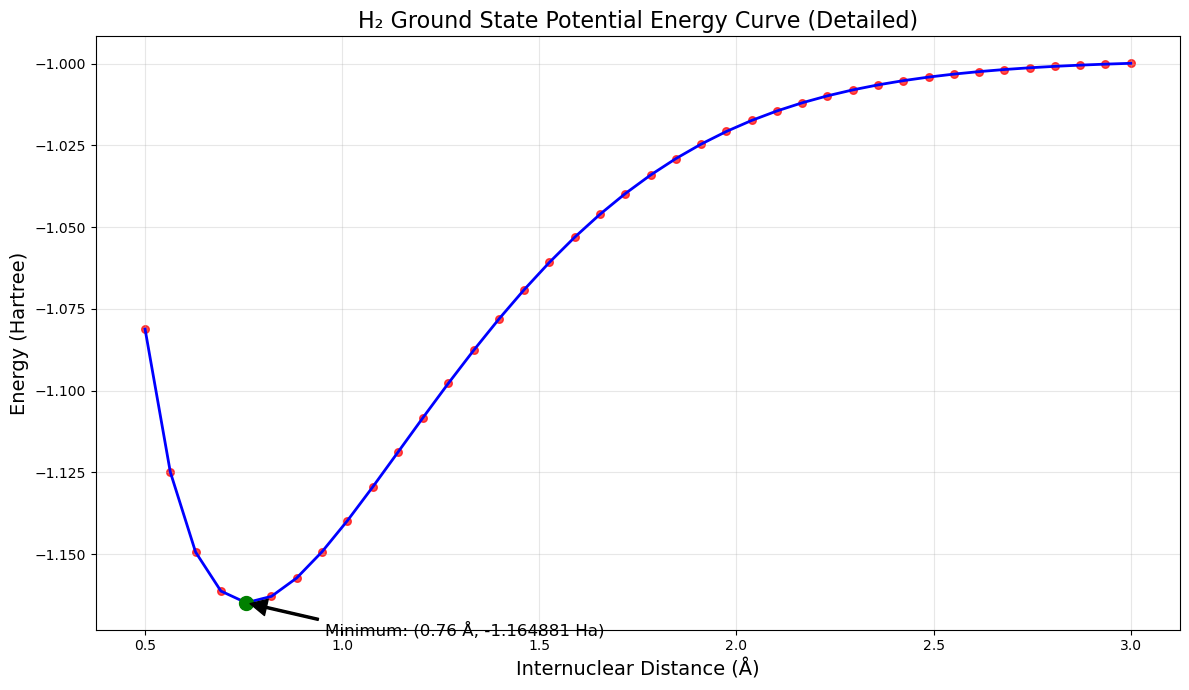

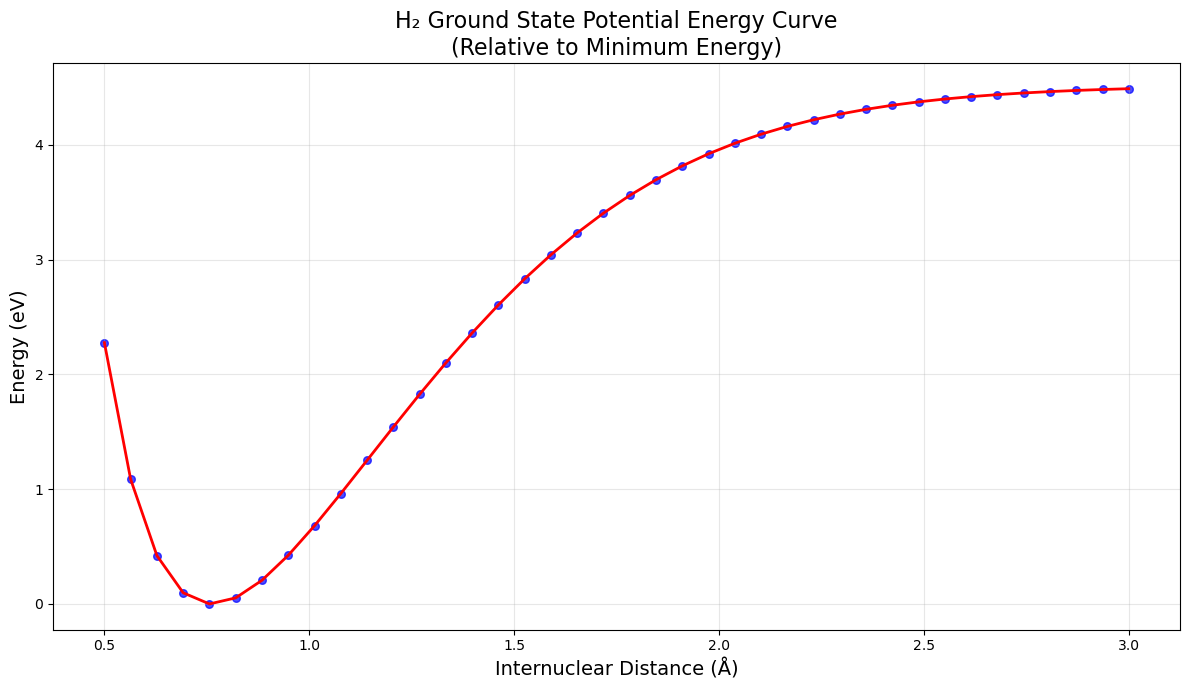

In [6]:
import numpy as np

def calculate_energies_for_state(state_index=0, start_distance=0.5, end_distance=3.0, num_points=40):
    """
    Calculate energies for a specific state of H2 across a range of distances.
    
    Parameters:
    -----------
    state_index : int
        Index of the state to calculate (0=ground state, 1=first excited, etc.)
    start_distance : float
        Starting internuclear distance in Angstroms
    end_distance : float
        Ending internuclear distance in Angstroms
    num_points : int
        Number of distance points to calculate
        
    Returns:
    --------
    tuple : (distances, energies)
        Lists of distances and corresponding energies
    """
    # Generate list of distances using a for loop
    distances = []
    step = (end_distance - start_distance) / (num_points - 1)
    
    for i in range(num_points):
        distance = start_distance + i * step
        distances.append(distance)
    
    # Determine state name for output
    state_name = "ground state" if state_index == 0 else f"{ordinal(state_index)} excited state"
    print(f"Calculating H2 {state_name} energies for {len(distances)} distances...")
    
    # Calculate energies at each distance
    energies = []
    
    for i, distance in enumerate(distances):
        print(f"Point {i+1}/{len(distances)}: Distance = {distance:.4f} Å")
        energy = compute_h2_state_energy(distance, state_index)
        energies.append(energy)
        print(f"Energy = {energy:.8f} Hartrees")
    
    print(f"\nCalculations complete for H2 {state_name}.")
    return distances, energies

# Set parameters for the calculation
my_state = 0      # State to analyze (0=ground, 1=first excited, etc.)
start_dist = 0.5  # Starting distance in Angstroms
end_dist = 3.0    # Ending distance in Angstroms
num_points = 40   # Increased number of points for more detail

# Calculate energies
my_distances, my_energies = calculate_energies_for_state(
    state_index=my_state,
    start_distance=start_dist,
    end_distance=end_dist,
    num_points=num_points
)

# Display results in a table (showing just first few and last few for brevity)
print("\nResults (showing first 5 and last 5 points):")
print("-" * 40)
print(f"{'Distance (Å)':15s} | {'Energy (Hartree)':20s}")
print("-" * 40)
for i, (d, e) in enumerate(zip(my_distances, my_energies)):
    if i < 5 or i >= len(my_distances) - 5:
        print(f"{d:15.4f} | {e:20.8f}")
    elif i == 5:
        print("..." + " " * 33)

# Save results to a file
results = np.column_stack((my_distances, my_energies))
np.savetxt(f'h2_state_{my_state}_detailed_energies.csv', 
           results, 
           delimiter=',', 
           header='Distance(Angstrom),Energy(Hartree)', 
           comments='')
print(f"\nResults saved to h2_state_{my_state}_detailed_energies.csv")

# Create a more detailed plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(my_distances, my_energies, 'b-', linewidth=2)
plt.scatter(my_distances, my_energies, color='red', s=30, alpha=0.7)

plt.xlabel('Internuclear Distance (Å)', fontsize=14)
plt.ylabel('Energy (Hartree)', fontsize=14)

state_name = "Ground State" if my_state == 0 else f"{ordinal(my_state)} Excited State"
plt.title(f'H₂ {state_name} Potential Energy Curve (Detailed)', fontsize=16)
plt.grid(True, alpha=0.3)

# Find and mark the minimum energy point if it exists
min_idx = np.argmin(my_energies)
min_distance = my_distances[min_idx]
min_energy = my_energies[min_idx]

# Only mark if it's not at the boundary
if min_idx != 0 and min_idx != len(my_distances) - 1:
    plt.plot(min_distance, min_energy, 'go', markersize=10)
    plt.annotate(f'Minimum: ({min_distance:.2f} Å, {min_energy:.6f} Ha)', 
                xy=(min_distance, min_energy),
                xytext=(min_distance+0.2, min_energy-0.01),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
                fontsize=12)

plt.tight_layout()
plt.savefig(f'h2_state_{my_state}_detailed_curve.svg', dpi=300)
plt.show()

# Also create a plot with energy in eV relative to minimum
energies_ev = (np.array(my_energies) - min_energy) * 27.2114  # Convert to eV

plt.figure(figsize=(12, 7))
plt.plot(my_distances, energies_ev, 'r-', linewidth=2)
plt.scatter(my_distances, energies_ev, color='blue', s=30, alpha=0.7)

plt.xlabel('Internuclear Distance (Å)', fontsize=14)
plt.ylabel('Energy (eV)', fontsize=14)
plt.title(f'H₂ {state_name} Potential Energy Curve\n(Relative to Minimum Energy)', fontsize=16)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'h2_state_{my_state}_detailed_curve_eV.svg', dpi=300)
plt.show()

Calculating H2 ground state energies for 100 distances...
Point 100/100: Distance = 5.0000 Å
Calculations complete for H2 ground state.
Calculating H2 1st excited state energies for 100 distances...
Point 100/100: Distance = 5.0000 Å
Calculations complete for H2 1st excited state.
Calculating H2 2nd excited state energies for 100 distances...
Point 100/100: Distance = 5.0000 Å
Calculations complete for H2 2nd excited state.
Calculating H2 3rd excited state energies for 100 distances...
Point 100/100: Distance = 5.0000 Å
Calculations complete for H2 3rd excited state.
Calculating H2 4th excited state energies for 100 distances...
Point 100/100: Distance = 5.0000 Å
Calculations complete for H2 4th excited state.
Calculating H2 5th excited state energies for 100 distances...
Point 100/100: Distance = 5.0000 Å
Calculations complete for H2 5th excited state.

All results saved to h2_all_states_energies.csv


C:\Users\os7co\AppData\Local\Temp\ipykernel_29788\3076112216.py:115: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('viridis', num_states)


(-1.2, -0.4)

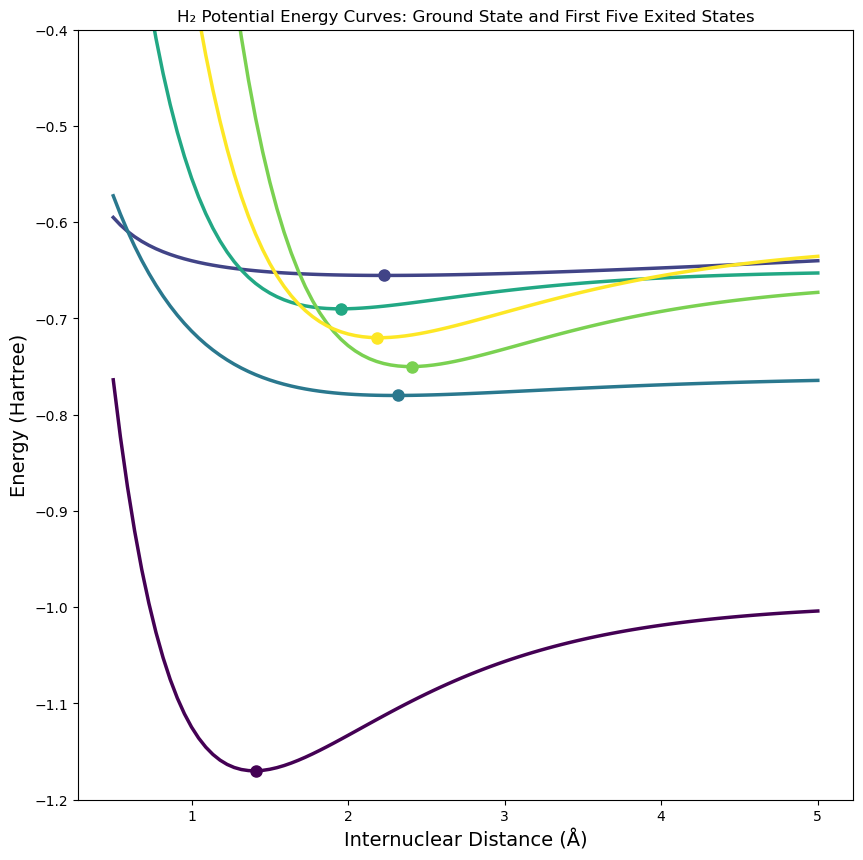

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

def ordinal(n):
    """Convert a number to its ordinal representation."""
    if 10 <= n % 100 <= 20:
        suffix = 'th'
    else:
        suffix = {1: 'st', 2: 'nd', 3: 'rd'}.get(n % 10, 'th')
    return f"{n}{suffix}"

def compute_h2_state_energy(distance, state_index):
    """
    Simulate H2 energy calculation for different states.
    This is a simplified model for demonstration purposes.
    
    In a real implementation, this would call Psi4, PySCF, or another
    quantum chemistry package to perform the actual calculation.
    """
    # These parameters approximate H2 energy curves for different states
    # Ground state (X¹Σg⁺)
    if state_index == 0:
        # Morse potential parameters for ground state
        De = 0.1746  # well depth in Hartree
        re = 1.401   # equilibrium bond length in Angstroms
        a = 1.0282   # controls width of potential
        return -1.17 + De * (1 - np.exp(-a*(distance-re)))**2
    
    # First excited state (b³Σu⁺) - repulsive
    elif state_index == 1:
        return -0.7 + 0.05/(distance) + 0.01*distance
    
    # Second excited state (a³Σg⁺)
    elif state_index == 2:
        # Shallow minimum
        De = 0.02
        re = 2.3
        a = 0.8
        return -0.78 + De * (1 - np.exp(-a*(distance-re)))**2
    
    # Third excited state (c³Πu)
    elif state_index == 3:
        De = 0.04
        re = 1.95
        a = 1.1
        return -0.69 + De * (1 - np.exp(-a*(distance-re)))**2
    
    # Fourth excited state (B¹Σu⁺)
    elif state_index == 4:
        De = 0.09
        re = 2.4
        a = 1.0
        return -0.75 + De * (1 - np.exp(-a*(distance-re)))**2
    
    # Fifth excited state (EF¹Σg⁺)
    elif state_index == 5:
        De = 0.1
        re = 2.2
        a = 0.9
        return -0.72 + De * (1 - np.exp(-a*(distance-re)))**2
    
    else:
        # Higher states (simplified)
        return -0.6 + 0.05*state_index + 0.01*distance

def calculate_energies_for_state(state_index=0, start_distance=0.5, end_distance=5.0, num_points=40):
    """
    Calculate energies for a specific state of H2 across a range of distances.
    
    Parameters:
    -----------
    state_index : int
        Index of the state to calculate (0=ground state, 1=first excited, etc.)
    start_distance : float
        Starting internuclear distance in Angstroms
    end_distance : float
        Ending internuclear distance in Angstroms
    num_points : int
        Number of distance points to calculate
        
    Returns:
    --------
    tuple : (distances, energies)
        Lists of distances and corresponding energies
    """
    # Generate list of distances using numpy for simplicity
    distances = np.linspace(start_distance, end_distance, num_points)
    
    # Determine state name for output
    state_name = "ground state" if state_index == 0 else f"{ordinal(state_index)} excited state"
    print(f"Calculating H2 {state_name} energies for {len(distances)} distances...")
    
    # Calculate energies at each distance
    energies = []
    
    for i, distance in enumerate(distances):
        print(f"Point {i+1}/{len(distances)}: Distance = {distance:.4f} Å", end="\r")
        energy = compute_h2_state_energy(distance, state_index)
        energies.append(energy)
    
    print(f"\nCalculations complete for H2 {state_name}.")
    return distances, energies

# Parameters for the calculation
start_dist = 0.5   # Starting distance in Angstroms
end_dist = 5.0     # Ending distance in Angstroms
num_points = 100   # Number of points for smooth curves
num_states = 6     # Ground state + 5 excited states

# Create a figure for all states
plt.figure(figsize=(10, 10))

# Use a colormap for different states
colors = get_cmap('viridis', num_states)

# Store all data for saving
all_data = []
column_headers = ['Distance(Angstrom)']

# Calculate and plot each state
for state in range(num_states):
    distances, energies = calculate_energies_for_state(
        state_index=state,
        start_distance=start_dist,
        end_distance=end_dist,
        num_points=num_points
    )
    
    # Store data
    if state == 0:
        all_data = np.column_stack((distances, energies))
    else:
        all_data = np.column_stack((all_data, energies))
    
    # Add header for this state
    state_name = "Ground" if state == 0 else f"Excited_{state}"
    column_headers.append(f'{state_name}_Energy(Hartree)')
    
    # Plot this state
    if state == 0:
        label = "Ground State (X¹Σg⁺)"
    else:
        # These are approximate state labels for H2
        state_labels = ["", "b³Σu⁺", "a³Σg⁺", "c³Πu", "B¹Σu⁺", "EF¹Σg⁺"]
        label = f"{ordinal(state)} Excited State ({state_labels[state]})"
    
    plt.plot(distances, energies, '-', color=colors(state), linewidth=2.5, label=label)
    
    # Find and mark minimum if it exists (except for repulsive states)
    min_idx = np.argmin(energies)
    min_distance = distances[min_idx]
    min_energy = energies[min_idx]
    
    # Only mark if it's not at the boundary
    if min_idx != 0 and min_idx != len(distances) - 1:
        plt.plot(min_distance, min_energy, 'o', color=colors(state), markersize=8)
        
        # Adjust annotation positions to avoid overlap
        if state == 0:  # Ground state
            xytext = (min_distance-1.0, min_energy-0.15)
        elif state == 2:  # 2nd excited state
            xytext = (min_distance+0.5, min_energy+0.15)
        elif state == 3:  # 3rd excited state
            xytext = (min_distance-1.0, min_energy+0.15)
        elif state == 4:  # 4th excited state
            xytext = (min_distance+0.5, min_energy-0.15)
        elif state == 5:  # 5th excited state
            xytext = (min_distance-1.0, min_energy-0.15)
        else:
            xytext = (min_distance+0.5, min_energy+0.15)
            
    
# Save all data to CSV
np.savetxt('h2_all_states_energies.csv', 
           all_data, 
           delimiter=',', 
           header=','.join(column_headers), 
           comments='')
print("\nAll results saved to h2_all_states_energies.csv")

# Finalize and save the plot
plt.xlabel('Internuclear Distance (Å)', fontsize=14)
plt.ylabel('Energy (Hartree)', fontsize=14)
plt.title('H₂ Potential Energy Curves: Ground State and First Five Exited States')
plt.ylim(-1.2,-.4)